# DAA line drawing algo
$y=mx+c$ \
here, $m=\dfrac{y_2-y_1}{x_2-x_1}$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
def DAA(x1, x2, y1, y2):
    dy, dx = (y2 - y1), (x2 - x1)
    m = dy / dx
    print(m)
    x, y = [x1], [y1]
    for i in range(dx):
        x1 += 1
        y1 += m
        x.append(x1)
        y.append(int(y1))

    print(x, y, sep="\n")
    return x, y

0.7142857142857143
[3, 4, 5, 6, 7, 8, 9, 10]
[3, 3, 4, 5, 5, 6, 7, 8]


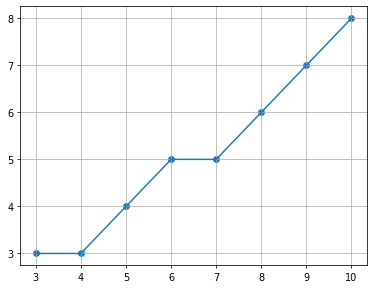

In [5]:
x1, x2, y1, y2 = (3, 10, 3, 8)
x, y = DAA(x1, x2, y1, y2)

plt.figure(dpi=70)
plt.scatter(x, y)
plt.plot(x, y)
plt.grid(True)

## Creating a grid filling class

In [36]:
class GridDraw:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = np.zeros((height, width))

    def fill(self, x, y, value=1):
        if x < self.width and y < self.height:
            self.grid[y, x] = value
        else:
            print(f"Coordinates ({x}, {y}) out of bounds.")

    def display(self):
        plt.imshow(self.grid, cmap="binary", origin="lower")
        plt.title(f" {self.width}x{self.height}")
        plt.show()


0.7142857142857143
[3, 4, 5, 6, 7, 8, 9, 10]
[3, 3, 4, 5, 5, 6, 7, 8]
3 3
4 3
5 4
6 5
7 5
8 6
9 7
10 8
Coordinates (10, 8) out of bounds.


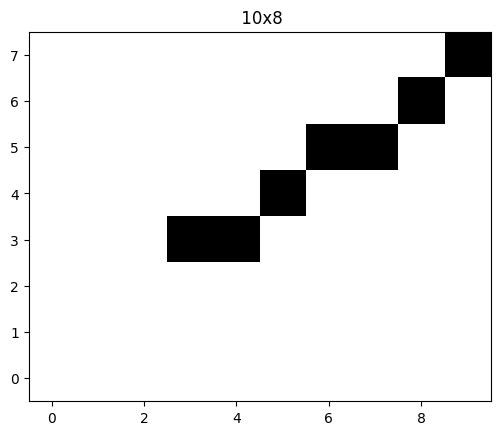

In [37]:
x1, x2, y1, y2 = (3, 10, 3, 8)
x, y = DAA(x1, x2, y1, y2)

grid = GridDraw(x2, y2)
for i, j in zip(x, y):
    print(i, j)
    grid.fill(i, j)
grid.display()